In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
%matplotlib inline
#reading the related csv excel file and assigning it to a variable,salaries.
salaries=pd.read_csv('multipleChoiceResponses - Copy.csv')
#since the first row is just a redundant one and doesn't contain necessary and useful data for analysis,we drop it.
salaries.drop(salaries.index[0],inplace=True)




C:\Users\sketa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1.	Data Cleaning:

In [2]:
#Now, we want to get the first impression of what the dataset is.
salaries.head()


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


By fast looking at the columns, I understood that the importance of columns Q1 to Q10 could be more than others. So, I did the data cleaning on these columns with more attention and details compared to others. In the next paragraphs, I will refer to these columns by using the desired dataset.

In [3]:
# We want to figure out the values in column 'Q1'.
salaries.Q1.unique()

array(['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'],
      dtype=object)

In [4]:
# We want to figure out the values which are in column 'Q2'.
salaries.Q2.unique()

array(['45-49', '30-34', '35-39', '22-24', '25-29', '18-21', '40-44',
       '55-59', '60-69', '50-54', '80+', '70-79'], dtype=object)

In [5]:
# We want to figure out the values which are in column 'Q3'.
salaries.Q3.unique()


array(['United States of America', 'Indonesia', 'India', 'Colombia',
       'Chile', 'Turkey', 'Hungary', 'Ireland', 'France', 'Argentina',
       'Japan', 'Nigeria', 'Spain', 'Other',
       'Iran, Islamic Republic of...',
       'United Kingdom of Great Britain and Northern Ireland', 'Poland',
       'Kenya', 'Denmark', 'Netherlands', 'China', 'Sweden', 'Ukraine',
       'Canada', 'Australia', 'Russia', 'Austria', 'Italy', 'Mexico',
       'Germany', 'I do not wish to disclose my location', 'Singapore',
       'Brazil', 'Switzerland', 'South Africa', 'South Korea', 'Malaysia',
       'Hong Kong (S.A.R.)', 'Egypt', 'Tunisia', 'Portugal', 'Thailand',
       'Morocco', 'Pakistan', 'Czech Republic', 'Romania', 'Israel',
       'Philippines', 'Bangladesh', 'Belarus', 'Viet Nam', 'Belgium',
       'New Zealand', 'Norway', 'Finland', 'Greece', 'Peru',
       'Republic of Korea'], dtype=object)

In [6]:
# We want to figure out the values which are in column 'Q4'.
salaries.Q4.unique()

array(['Doctoral degree', 'Bachelor’s degree', 'Master’s degree',
       'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'I prefer not to answer', 'No formal education past high school',
       nan], dtype=object)

In [7]:
# We want to figure out the values which are in column 'Q5'.
salaries.Q5.unique()

array(['Other', 'Engineering (non-computer focused)',
       'Computer science (software engineering, etc.)',
       'Social sciences (anthropology, psychology, sociology, etc.)',
       'Mathematics or statistics', 'Physics or astronomy',
       'Information technology, networking, or system administration',
       'A business discipline (accounting, economics, finance, etc.)',
       'Environmental science or geology',
       'Medical or life sciences (biology, chemistry, medicine, etc.)',
       'I never declared a major',
       'Humanities (history, literature, philosophy, etc.)', nan,
       'Fine arts or performing arts'], dtype=object)

In [8]:
# We want to figure out the values which are in column 'Q6'.
salaries.Q6.unique()

array(['Consultant', 'Other', 'Data Scientist', 'Not employed',
       'Data Analyst', 'Software Engineer', 'Student',
       'Research Assistant', 'Chief Officer', 'Manager',
       'Research Scientist', 'Business Analyst', 'Data Engineer',
       'Developer Advocate', 'Marketing Analyst',
       'Product/Project Manager', 'Principal Investigator', 'Salesperson',
       'DBA/Database Engineer', 'Statistician', 'Data Journalist', nan],
      dtype=object)

In [9]:
# We want to figure out the values which are in column 'Q7'.
salaries.Q7.unique()

array(['Other', 'Manufacturing/Fabrication', 'I am a student', nan,
       'Computers/Technology', 'Academics/Education',
       'Online Service/Internet-based Services', 'Medical/Pharmaceutical',
       'Energy/Mining', 'Retail/Sales', 'Military/Security/Defense',
       'Insurance/Risk Assessment', 'Hospitality/Entertainment/Sports',
       'Broadcasting/Communications', 'Accounting/Finance',
       'Shipping/Transportation', 'Online Business/Internet-based Sales',
       'Non-profit/Service', 'Government/Public Service', 'Marketing/CRM'],
      dtype=object)

In [10]:
# We want to figure out the values which are in column 'Q8'.
salaries.Q8.unique()

array([nan, '5-10', '0-1', '10-15', '3-4', '1-2', '2-3', '15-20', '4-5',
       '20-25', '25-30', '30 +'], dtype=object)

In [11]:
# We want to figure out the values which are in column 'Q9'.
salaries.Q9.unique()

array([nan, '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [12]:
# We want to figure out the values which are in column 'Q10'.
salaries.Q10.unique()

array(['I do not know', 'No (we do not use ML methods)', nan,
       'We are exploring ML methods (and may one day put a model into production)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

After applying unique() method on the desired dataset, I understood that columns Q4, Q5, Q6, Q7, Q8, Q9, Q10 contain nan values.

In [13]:
# We want to figure out the number of nan values in the desired dataset.
salaries.loc[:,['Q4', 'Q5', 'Q6','Q7','Q8','Q9','Q10']].isnull().sum(axis=0)

Q4      421
Q5      912
Q6      959
Q7     2174
Q8     2758
Q9     3674
Q10    3190
dtype: int64

#### In the next 9 paragraphs, I will explain my guess of the reason for why null values appear in each of the columns:

Q4: Maybe a respondent cannot predict their education within the next 2 years, or they want to indirectly refuse to answer the question.

Q5: the respondent may not wish to answer the question

Q6: the respondent may not wish to answer a question

Q7: the respondent may not wish to answer the question

Q8: I think the number of years of experience is not something common that everyone could remember. In other words, some respondents may not easily recall how many years of experience they have and therefore, they do not answer to this question.

Q9: I think one reason of appearing nan values in this column can be that some respondent s only know their current monthly current compensation and it would be difficult for them to calculate their yearly compensation. 

Q10: Some respondents may not be familiar with machine learning methods.

For columns having "part" as parts of their labels: nan values in these columns show that the column is not the answer of a respondent to the related question.

For the whole dataset, there may be a lot of reasons for appearing nan values. One of them could be that since the number of the questions asked from every respondent is a lot, they may get tired and not be able to concentrate on some of the questions well and recall the necessary information. One other possibility is that the respondent may not wish to answer a question, however they do not want to show this directly. By not choosing one the existing options, they indirectly refuse to answer the question. Also, some responses may have been brought in columns having "other" in their labels.


First of all, for data cleaning, I have to deal with null values and also values which are related to the information which is not disclosed such as "I do not wish to disclose my approximate yearly compensation". For the latter case, I will use the abbreviation ndv in the rest of this document. As the first step of data cleaning, I implemented two methods for dealing with nan and ndv values on the desired dataset:
a)	Completely drop the rows with such values.
b)	Replace them with the mode of the related columns.


## Option a) Completely drop the rows with nan or ndv values from the desired dataset:

In the first approach, by applying dropna function to the columns with nan values in the desired dataset, I will completely remove the rows with these values. Then, I will assign ndv values in the first 10 columns to a variable, indexNames, and drop them from the desired dataset. 

In [14]:
salaries.dropna(subset=['Q4', 'Q6','Q5','Q7','Q8','Q9','Q10'],inplace=True)
# We will drop ndv values.
indexNames = salaries[(salaries['Q9']== "I do not wish to disclose my approximate yearly compensation") | (salaries['Q1']== "Prefer not to say")| (salaries['Q4']==  'I prefer not to answer')| (salaries['Q10']== 'I do not know')| (salaries['Q3']== 'I do not wish to disclose my location')].index
salaries.drop(indexNames , inplace=True)
# Now, Let's review the updated elements of some columns.
salaries.Q1.unique()
salaries.Q5.unique()

array(['Engineering (non-computer focused)',
       'Information technology, networking, or system administration',
       'Mathematics or statistics',
       'A business discipline (accounting, economics, finance, etc.)',
       'Environmental science or geology',
       'Medical or life sciences (biology, chemistry, medicine, etc.)',
       'Computer science (software engineering, etc.)', 'Other',
       'Physics or astronomy',
       'Social sciences (anthropology, psychology, sociology, etc.)',
       'Humanities (history, literature, philosophy, etc.)',
       'Fine arts or performing arts', 'I never declared a major'],
      dtype=object)

I think this approach is not good because it will completely drop the rows containing nan values. Also, after applying isnull function on the columns containing nan values in the desired dataset, I saw that the number of nan values in them is not low enough to convince us to drop them. For these reasons, I will use the second approach to clean the data in the desired dataset for the next parts of my analysis. 

## Option b)	Replace nan or ndv values with the mode of the related columns.

For this approach, If I want to replace the nan values with the mode of the related columns, I have to be careful that the mode of some columns may be nan or ndv values. Therefore, first, I should be aware of the mode of each column after dropping nan or ndv values and assign the mode of column i to variable mode(i). 

In [15]:
# We will assign the mode of each column to a variable.
mode1=salaries.Q1.mode()[0]
mode1

'Male'

In [16]:
mode2=salaries.Q2.mode()[0]
mode2

'25-29'

In [17]:
mode3=salaries.Q3.mode()[0]
mode3

'United States of America'

In [18]:
mode4=salaries.Q4.mode()[0]
mode4

'Master’s degree'

In [19]:
mode5=salaries.Q5.mode()[0]
mode5

'Computer science (software engineering, etc.)'

In [20]:
mode6=salaries.Q6.mode()[0]
mode6

'Data Scientist'

In [21]:
mode7=salaries.Q7.mode()[0]
mode7

'Computers/Technology'

In [22]:
mode8=salaries.Q8.mode()[0]
mode8

'0-1'

In [23]:
mode9=salaries.Q9.mode()[0]
mode9

'0-10,000'

In [24]:
mode10=salaries.Q10.mode()[0]
mode10

'We are exploring ML methods (and may one day put a model into production)'

I will again read the csv file and assign it to a new variable, salaries2. Then, I will fill the nan values of each column with the related mode(i) values. 

In [25]:
#  again reading the csv file and assigning it to a new variable , salaries 2
salaries2=pd.read_csv('multipleChoiceResponses - Copy.csv')
# Again,I will drop the first row as it doesn't include necessary data.
salaries2.drop(salaries2.index[0],inplace=True)


    
# Here, I will fill the nan values with the mode of each column in the desired dataset.
salaries2.Q1.fillna(mode1,axis=0,inplace=True)
salaries2.Q2.fillna(mode2,axis=0,inplace=True)
salaries2.Q3.fillna(mode3,axis=0,inplace=True)
salaries2.Q4.fillna(mode4,axis=0,inplace=True)
salaries2.Q5.fillna(mode5,axis=0,inplace=True)
salaries2.Q6.fillna(mode6,axis=0,inplace=True)
salaries2.Q7.fillna(mode7,axis=0,inplace=True)
salaries2.Q8.fillna(mode8,axis=0,inplace=True)
salaries2.Q9.fillna(mode9,axis=0,inplace=True)
salaries2.Q10.fillna(mode10,axis=0,inplace=True)






In the Kaggle website, it is mentioned that When survey respondents selected the "Other" category, an option was given for a text response. These text responses were separated and shuffled to protect user privacy.  So, the columns having these phrases in their labels should be dropped from the dataset as they do not show useful information about each respondent.



In [26]:
# dropping "Other_text" columnns.
cols=salaries2.columns
cols_to_del=[]
for col in cols:
    if col.find('OTHER')!=-1:
        cols_to_del.append(col)
    if col.find('TEXT')!=-1:
        cols_to_del.append(col)

In [28]:
salaries2.drop(columns=cols_to_del,inplace=True)
salaries2.shape

(23859, 360)

I should also get rid of ndv values. . I know which columns contain ndv values after I applied unique() function to the columns. So, I will replace such values with the mode(i) of the related columns. 

In [29]:
#Now let's consider the columns containing nondisclosed information and replace such values with the mode of the related columns.
salaries2.Q1 = salaries2.Q1.replace({ "Prefer not to say": mode1})

In [30]:
salaries2.Q3=salaries2.Q3.replace({'I do not wish to disclose my location':mode3})

In [31]:
salaries2.Q4 = salaries2.Q4.replace({'I prefer not to answer':mode4})

In [32]:
print(mode9)
salaries2.Q9 = salaries2.Q9.replace({"I do not wish to disclose my approximate yearly compensation": mode9})

0-10,000


In [33]:
salaries2.Q10 = salaries2.Q10.replace({'I do not know':mode10})

In [37]:
salaries.isnull().sum(axis=0)

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                         0
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                         0
Q9                                         0
Q10                                        0
Q11_Part_1                              6333
Q11_Part_2                              9309
Q11_Part_3                              9379
Q11_Part_4                              7900
Q11_Part_5                             10064
Q11_Part_6                             11221
Q11_Part_7                             12875
Q11_OTHER_TEXT                             0
Q12_MULTIP

In order to better analyse the data and decrease the computations especially when I want to convert categorical data into numerical one, I should reduce the variety of values in columns containing categorical data with a lot of ranges. In other words, in some columns, the frequency of some values related to others is a little. I will replace such values with 'other'. To do that, I choose the columns I think have many categorical values and assign the values which have repeated less than 200 times in the column to “value_mask” list. Finally, I will identify the values in “value_mask” in salaries2 and replace them with ”other”.

In [38]:
# in some columns, the frequency of some values related to others is low. We will replace such values with 'other'.
for i in ["Q3","Q5","Q6","Q7"]:
    list_value = salaries2[i].value_counts()
    value_mask = salaries2[i].isin(list_value.index[list_value < 200])
    salaries2.loc[value_mask,i] = "Other"
    print(salaries2[i].unique())

['United States of America' 'Other' 'India' 'Turkey' 'France' 'Japan'
 'Nigeria' 'Spain' 'United Kingdom of Great Britain and Northern Ireland'
 'Poland' 'Netherlands' 'China' 'Ukraine' 'Canada' 'Australia' 'Russia'
 'Italy' 'Mexico' 'Germany' 'Brazil']
['Other' 'Engineering (non-computer focused)'
 'Computer science (software engineering, etc.)'
 'Social sciences (anthropology, psychology, sociology, etc.)'
 'Mathematics or statistics' 'Physics or astronomy'
 'Information technology, networking, or system administration'
 'A business discipline (accounting, economics, finance, etc.)'
 'Environmental science or geology'
 'Medical or life sciences (biology, chemistry, medicine, etc.)'
 'Humanities (history, literature, philosophy, etc.)']
['Consultant' 'Other' 'Data Scientist' 'Not employed' 'Data Analyst'
 'Software Engineer' 'Student' 'Research Assistant' 'Chief Officer'
 'Manager' 'Research Scientist' 'Business Analyst' 'Data Engineer'
 'Product/Project Manager' 'Statistician']
['Oth

Starting from Q11, there are some columns that have “part” in their label. Different parts of these columns are related to different possible answers. A good way to deal with nan values in such columns is to replace nan values in these columns with 0 and not nan values with 1.

In [39]:
columns=salaries2.columns
cols=['Q11','Q13','Q14','Q15','Q16','Q19','Q21','Q27','Q28','Q29','Q30','Q31','Q33','Q36','Q38','Q42','Q44','Q45','Q47','Q40','Q50']
non_dummy_columns = set()
for column in columns:
    for col in cols:
         if column.find(col)!=-1:
            non_dummy_columns.add(column)
            salaries2[column] = (salaries2[column].notnull()).astype('int')             


 Columns having ‘Q34’ and ‘Q35’ as parts of their labels contain numerical data. Therefore, a good way to dealing with nan values in these columns is to replace nan values with the mean of these columns.

In [42]:
salaries2.Q34_Part_2.unique()
salaries2['Q34_Part_3']= salaries2['Q34_Part_3'].astype(float)
salaries2[['Q34_Part_3']].mean(axis = 0, numeric_only = True, skipna = True)[0]


13.618801280040156

In [43]:
cols=salaries2.columns
cols_to_fillna=[]
for col in cols:
    if col.find('Q34')!=-1:
        cols_to_fillna.append(col)
    if col.find('Q35')!=-1:
        cols_to_fillna.append(col)

for i in cols_to_fillna:
    salaries2[i]= salaries2[i].astype(float)
    column_mean = salaries2[[i]].mean(axis = 0, skipna = True, numeric_only = True)[0]
    salaries2[i].fillna(value=column_mean,axis=0,inplace=True)
    

salaries2["Q34_Part_3"].unique()






array([ 13.61880128,  20.        ,  15.        ,  13.        ,
        50.        ,  30.        ,   0.        ,  10.        ,
         5.        ,   2.        ,  40.        ,  90.        ,
        25.        ,  35.        ,   7.        ,   1.        ,
         3.        ,  60.        ,   8.        ,  18.        ,
        45.        ,  22.        ,  27.        ,  19.        ,
         4.        ,  26.        ,  12.        ,  24.        ,
        29.        ,  16.        ,  23.5       ,  80.        ,
        99.        ,   6.        ,  17.        ,  33.        ,
        28.        ,  42.        , 100.        ,  16.67      ,
        70.        ,  56.        ,  34.        ,  43.        ,
         9.        ,  14.        ,  11.        ,  12.5       ,
        75.        ,  23.        ,  78.        ,  55.        ,
        14.286     ,   6.25      ,   7.5       ,   8.33      ,
        85.        ,  31.        ,   1.8       ])

Finally, if we have other nan values in the dataset, they will be replaced with “other”.

In [44]:
# I will replace the remaining nan values with 'other'
salaries2.fillna(value='other',inplace=True)

In [46]:
salaries4=salaries2.copy()
# The following codes are inserted  to make the plots look better and enable us to analys them more efficiently.
salaries2.Q9 =salaries2.Q9.replace({'0-10,000' : 0})
salaries2.Q9 =salaries2.Q9.replace({ '10-20,000': 1})
salaries2.Q9 =salaries2.Q9.replace({  '20-30,000': 2})
salaries2.Q9 =salaries2.Q9.replace({ '30-40,000': 3})
salaries2.Q9 =salaries2.Q9.replace({ '40-50,000': 4})
salaries2.Q9 =salaries2.Q9.replace({ '50-60,000': 5})
salaries2.Q9 =salaries2.Q9.replace({ '60-70,000': 6})
salaries2.Q9 =salaries2.Q9.replace({ '70-80,000': 7})
salaries2.Q9 =salaries2.Q9.replace({ '80-90,000': 8})
salaries2.Q9 =salaries2.Q9.replace({ '90-100,000': 9})
salaries2.Q9 =salaries2.Q9.replace({ '100-125,000': 10})
salaries2.Q9 =salaries2.Q9.replace({ '125-150,000': 11})
salaries2.Q9 =salaries2.Q9.replace({ '150-200,000': 12})
salaries2.Q9 =salaries2.Q9.replace({ '200-250,000': 13})
salaries2.Q9 =salaries2.Q9.replace({ '250-300,000': 14})
salaries2.Q9 =salaries2.Q9.replace({ '300-400,000': 15})
salaries2.Q9 =salaries2.Q9.replace({ '400-500,000': 16})
salaries2.Q9 =salaries2.Q9.replace({ '500,000+': 17})
salaries2.Q9.unique()
# make a copy of salaries2 and import new codes to the new dataframe.
salaries3 =salaries2.copy()

## Convert categorical data into numerical data:

Since some machine learning algorithms do not accept categorical data as an input, I have to convert categorical data in the dataset into numerical one. A possible way may be to assign a number to each value in the category. However, this encoding is not a good one because it implies an ordered relationship between the values. Only for column ‘Q9’ in which ordered relationship could be implemented, it can work. For other columns, I will use get_dummies encoding.

In this encoding, some extra columns will be considered for each column. The number of these columns is equal to the unique values of each primary column. For each feature value, if the related value is equal to the extra columns, it will take 1 for the column and 0 for the other extra columns.

In get_dummies encoding, I should exclude some columns as they contain numerical data or the desired encoding have already implemented on them. I made a set for these columns showing that they should not go under get_dummies and named it 'non_dummy_columns'. The set consists of the following columns:





•	Columns having ‘Q34’ and ‘Q35’ as parts of their labels as they contain numerical data. 

•	Columns having ‘part’ as parts of their labels as they have already encoded.

•	Column ‘Q9’ as it is the target variable.

In [47]:
non_dummy_columns.add('Q9')
for column in columns:
    for col in ['Q34', 'Q35']:
         if column.find(col)!=-1:
            non_dummy_columns.add(column)
dummy_cols = list(set(salaries2.columns) - non_dummy_columns)
salaries2 = pd.get_dummies(salaries2, columns=dummy_cols)
salaries2.columns

Index(['Q9', 'Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4',
       'Q11_Part_5', 'Q11_Part_6', 'Q11_Part_7', 'Q13_Part_1', 'Q13_Part_2',
       ...
       'Q17_Other', 'Q17_PHP', 'Q17_Python', 'Q17_R', 'Q17_Ruby',
       'Q17_SAS/STATA', 'Q17_SQL', 'Q17_Scala', 'Q17_Visual Basic/VBA',
       'Q17_other'],
      dtype='object', length=8274)

# 2.	Exploratory data analysis:

## a)

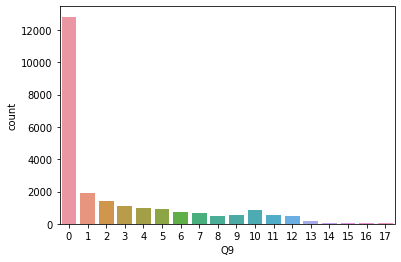

In [51]:
#We want to know the frequency of each class in column 'Q9':
sns.countplot(x='Q9',data=salaries3)

For part a, after looking at the columns and some of their attributes, I decided to use columns Q1, Q4, and Q6 to study the trends in the data and plot barplot and countplot to observe the normalized frequency and frequency of each of the feature value of these columns in column Q9 . 

All of these three plots are based on column Q9. The length of values in Q9 is high and if they are shown in the plots, the plots will become very crowded. In order to deal with this problem and make the plots be read better, I will insert some codes for the values in Q9 in salaries3, which is a copy of salaries2. 

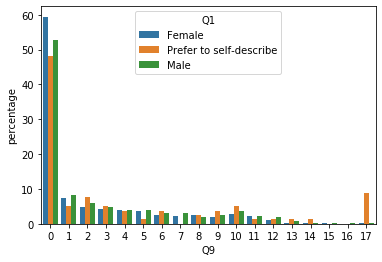

In [52]:
# drawing barplot
gender_counts = (salaries3.groupby(['Q1'])['Q9']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q9'))
p = sns.barplot(x="Q9", y="percentage", hue="Q1", data=gender_counts)
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

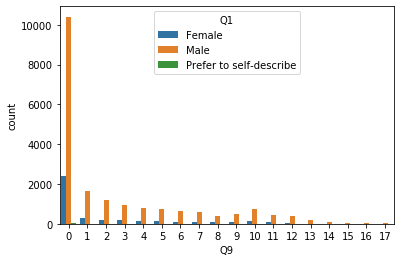

In [53]:
# drawing countplot
sns.countplot(x=salaries3.Q9, hue=salaries3.Q1, data=salaries3)

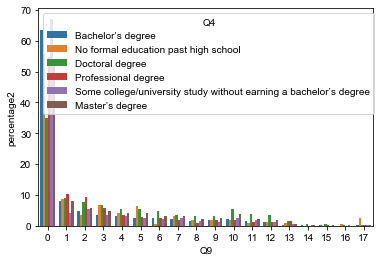

In [54]:
#drawing barplot
gender_counts = (salaries3.groupby(['Q4'])['Q9']
                     .value_counts(normalize=True)
                     .rename('percentage2')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q9'))
p = sns.barplot(x="Q9", y="percentage2", hue="Q4", data=gender_counts)
sns.set(rc={'figure.figsize':(11.7,8.27)})


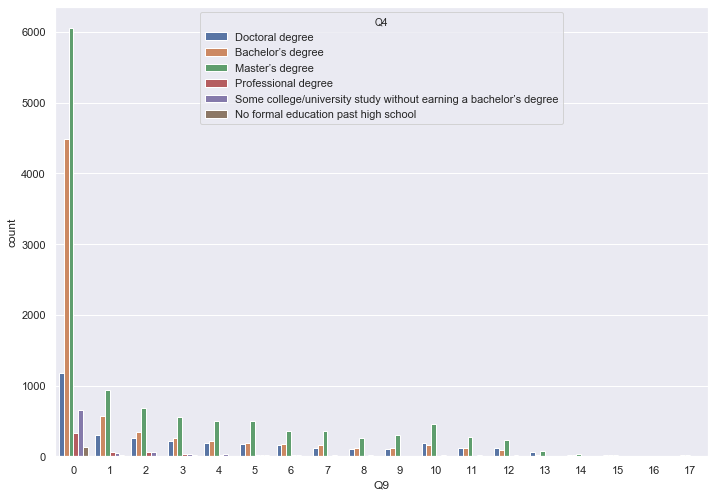

In [55]:
#drawing countplot
sns.countplot(x=salaries3.Q9, hue=salaries3.Q4, data=salaries3)
sns.set(rc={'figure.figsize':(11.7,8.27)})

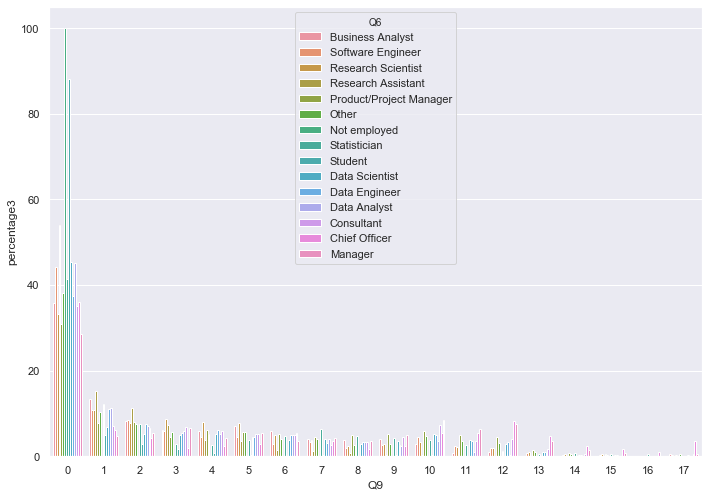

In [56]:
#drawing barplot
gender_counts = (salaries3.groupby(['Q6'])['Q9']
                     .value_counts(normalize=True)
                     .rename('percentage3')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q9'))
p = sns.barplot(x="Q9", y="percentage3", hue="Q6", data=gender_counts)
sns.set(rc={'figure.figsize':(11.7,8.27)})

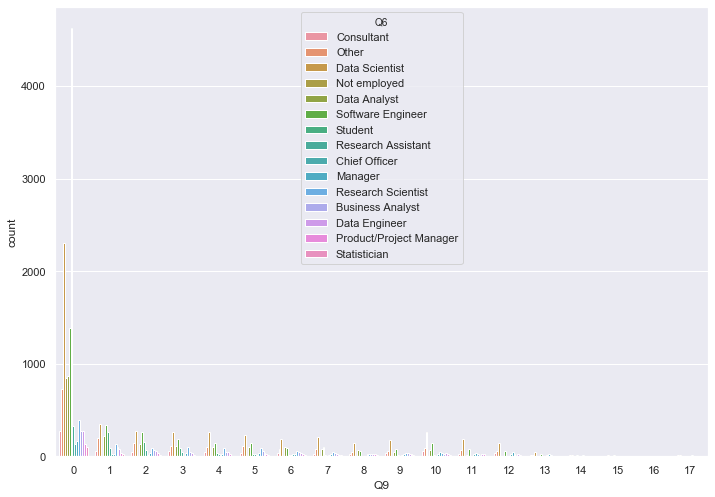

In [57]:
#drawing countplot
sns.countplot(x=salaries3.Q9, hue=salaries3.Q6, data=salaries3)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In the next 3 paragraphs, I will interpret my understandings of the plots:


•	The first 2 plots show the bar plot and count plot of categories in Q9, respectively separated with colors showing different categories in Q1. As we can see, almost 59% of females, 48% of males, and 53% of persons preferring to self-describe stay in the first compensation category. It means that their approximate yearly compensation is 0-10000. In the higher compensations, the difference between males and females is less, but in the first category the difference is considerable. Hence, I can conclude that in low compensation, the difference in gender could be determining.

•	The next 2 plots show the bar plot and count plot of categories in Q9, respectively separated with colors showing different categories in Q1. As we can see, educational status can be a determining factor for yearly compensation, too. For example, the percentage of respondents with doctoral degree is the lowest in the first compensation category and as the class of compensation goes up, the percentage of these respondents will also increase.

•	The final 2 plots show the bar plot and count plot of categories in Q9, respectively separated with colors showing different categories in Q1. As we can see and it is obvious, almost all not employed respondents have 0-10000 yearly compensation. We can also observe that the percentage of manager respondents in the first compensation category is less than others. Overall, we can conclude that the job of a respondent is another determining attribute related to compensation.



## b)

The total number of features is very high so it would be difficult to  determine feature importance for all of them and I have selected some of them manually. 

For part b, I have plotted the correlation matrix between column “Q9” and every column in the set {“Q2”, “Q3”, “Q5”, “Q7”}.

Because correlation matrix only works on numerical data, I should first apply get_dummies on the dataframe containing "Q9" and each of the columns in the mentioned set.

In [58]:
df=salaries3[['Q3','Q9']]
df1=pd.get_dummies(df)
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Q9,Q3_Australia,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Mexico,Q3_Netherlands,Q3_Nigeria,Q3_Other,Q3_Poland,Q3_Russia,Q3_Spain,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America
Q9,1,0.0735831,-0.0461617,0.0726179,-0.120788,0.0194059,0.0432238,-0.227756,-0.014368,0.0298497,-0.0209044,0.030401,-0.053989,-0.0762269,-0.0253878,-0.0716414,-0.00294261,-0.0597382,-0.0371735,0.0584697,0.356329
Q3_Australia,0.0735831,1,-0.0211287,-0.019086,-0.0322168,-0.019086,-0.021099,-0.056448,-0.0145545,-0.0189723,-0.0109434,-0.0126702,-0.0111061,-0.0617652,-0.0133866,-0.0231619,-0.0170592,-0.0139605,-0.0122359,-0.0206197,-0.0618268
Q3_Brazil,-0.0461617,-0.0211287,1,-0.0287526,-0.0485338,-0.0287526,-0.0317851,-0.0850374,-0.021926,-0.0285812,-0.0164859,-0.0190873,-0.0167311,-0.0930476,-0.0201665,-0.0348928,-0.0256993,-0.0210311,-0.018433,-0.0310631,-0.0931404
Q3_Canada,0.0726179,-0.019086,-0.0287526,1,-0.0438418,-0.0259729,-0.0287123,-0.0768163,-0.0198063,-0.0258181,-0.0148921,-0.017242,-0.0151136,-0.0840522,-0.0182169,-0.0315195,-0.0232148,-0.0189979,-0.016651,-0.02806,-0.084136
Q3_China,-0.120788,-0.0322168,-0.0485338,-0.0438418,1,-0.0438418,-0.0484657,-0.129664,-0.0334327,-0.0435804,-0.0251376,-0.0291041,-0.0255114,-0.141878,-0.0307498,-0.0532044,-0.0391861,-0.032068,-0.0281066,-0.0473647,-0.14202
Q3_France,0.0194059,-0.019086,-0.0287526,-0.0259729,-0.0438418,1,-0.0287123,-0.0768163,-0.0198063,-0.0258181,-0.0148921,-0.017242,-0.0151136,-0.0840522,-0.0182169,-0.0315195,-0.0232148,-0.0189979,-0.016651,-0.02806,-0.084136
Q3_Germany,0.0432238,-0.021099,-0.0317851,-0.0287123,-0.0484657,-0.0287123,1,-0.0849181,-0.0218953,-0.0285411,-0.0164628,-0.0190605,-0.0167076,-0.0929171,-0.0201382,-0.0348439,-0.0256632,-0.0210016,-0.0184072,-0.0310195,-0.0930098
Q3_India,-0.227756,-0.056448,-0.0850374,-0.0768163,-0.129664,-0.0768163,-0.0849181,1,-0.0585783,-0.0763584,-0.0440442,-0.0509941,-0.0446992,-0.248589,-0.0538775,-0.0932208,-0.068659,-0.0561872,-0.0492462,-0.082989,-0.248837
Q3_Italy,-0.014368,-0.0145545,-0.021926,-0.0198063,-0.0334327,-0.0198063,-0.0218953,-0.0585783,1,-0.0196882,-0.0113564,-0.0131483,-0.0115252,-0.0640961,-0.0138918,-0.024036,-0.017703,-0.0144873,-0.0126976,-0.0213979,-0.06416
Q3_Japan,0.0298497,-0.0189723,-0.0285812,-0.0258181,-0.0435804,-0.0258181,-0.0285411,-0.0763584,-0.0196882,1,-0.0148033,-0.0171392,-0.0150235,-0.0835511,-0.0181083,-0.0313316,-0.0230764,-0.0188846,-0.0165517,-0.0278927,-0.0836344


In [59]:
df2=salaries3[['Q5','Q9']]
df3=pd.get_dummies(df2)
corr2 = df3.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Q9,"Q5_A business discipline (accounting, economics, finance, etc.)","Q5_Computer science (software engineering, etc.)",Q5_Engineering (non-computer focused),Q5_Environmental science or geology,"Q5_Humanities (history, literature, philosophy, etc.)","Q5_Information technology, networking, or system administration",Q5_Mathematics or statistics,"Q5_Medical or life sciences (biology, chemistry, medicine, etc.)",Q5_Other,Q5_Physics or astronomy,"Q5_Social sciences (anthropology, psychology, sociology, etc.)"
Q9,1,0.0734951,-0.16083,0.0210438,0.0147037,0.0683512,-0.0436717,0.0528201,0.0378359,0.00924481,0.0827677,0.0604703
"Q5_A business discipline (accounting, economics, finance, etc.)",0.0734951,1,-0.249189,-0.122146,-0.0294928,-0.0304213,-0.0604813,-0.107007,-0.055453,-0.0591171,-0.0629284,-0.0439235
"Q5_Computer science (software engineering, etc.)",-0.16083,-0.249189,1,-0.375038,-0.0905547,-0.0934059,-0.185702,-0.328554,-0.170263,-0.181514,-0.193216,-0.134863
Q5_Engineering (non-computer focused),0.0210438,-0.122146,-0.375038,1,-0.0443877,-0.0457853,-0.0910266,-0.161049,-0.0834588,-0.0889735,-0.0947096,-0.0661064
Q5_Environmental science or geology,0.0147037,-0.0294928,-0.0905547,-0.0443877,1,-0.0110551,-0.0219788,-0.038886,-0.0201515,-0.0214831,-0.0228681,-0.0159617
"Q5_Humanities (history, literature, philosophy, etc.)",0.0683512,-0.0304213,-0.0934059,-0.0457853,-0.0110551,1,-0.0226708,-0.0401104,-0.020786,-0.0221595,-0.0235881,-0.0164643
"Q5_Information technology, networking, or system administration",-0.0436717,-0.0604813,-0.185702,-0.0910266,-0.0219788,-0.0226708,1,-0.0797442,-0.041325,-0.0440557,-0.0468959,-0.0327329
Q5_Mathematics or statistics,0.0528201,-0.107007,-0.328554,-0.161049,-0.038886,-0.0401104,-0.0797442,1,-0.0731144,-0.0779456,-0.0829707,-0.0579128
"Q5_Medical or life sciences (biology, chemistry, medicine, etc.)",0.0378359,-0.055453,-0.170263,-0.0834588,-0.0201515,-0.020786,-0.041325,-0.0731144,1,-0.0403929,-0.0429971,-0.0300116
Q5_Other,0.00924481,-0.0591171,-0.181514,-0.0889735,-0.0214831,-0.0221595,-0.0440557,-0.0779456,-0.0403929,1,-0.0458382,-0.0319947


In [60]:
df4=salaries3[['Q2','Q9']]
df5=pd.get_dummies(df4)
corr3 = df5.corr()
corr3.style.background_gradient(cmap='coolwarm')

,Q9,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,Q2_70-79,Q2_80+
Q9,1,-0.226546,-0.220447,-0.040193,0.134202,0.144714,0.126572,0.121046,0.115929,0.102464,0.0880982,0.00984861,0.0223208
Q2_18-21,-0.226546,1,-0.20015,-0.225284,-0.165601,-0.123326,-0.0938964,-0.0737618,-0.0603892,-0.0450898,-0.041088,-0.01802,-0.0154533
Q2_22-24,-0.220447,-0.20015,1,-0.309145,-0.227246,-0.169234,-0.128849,-0.10122,-0.082869,-0.0618744,-0.056383,-0.024728,-0.0212058
Q2_25-29,-0.040193,-0.225284,-0.309145,1,-0.255782,-0.190485,-0.145029,-0.11393,-0.0932753,-0.0696442,-0.0634633,-0.0278332,-0.0238688
Q2_30-34,0.134202,-0.165601,-0.227246,-0.255782,1,-0.140022,-0.106608,-0.0837475,-0.0685646,-0.0511939,-0.0466505,-0.0204596,-0.0175454
Q2_35-39,0.144714,-0.123326,-0.169234,-0.190485,-0.140022,1,-0.0793928,-0.0623683,-0.0510612,-0.038125,-0.0347414,-0.0152366,-0.0130664
Q2_40-44,0.126572,-0.0938964,-0.128849,-0.145029,-0.106608,-0.0793928,1,-0.0474852,-0.0388764,-0.0290272,-0.026451,-0.0116007,-0.00994831
Q2_45-49,0.121046,-0.0737618,-0.10122,-0.11393,-0.0837475,-0.0623683,-0.0474852,1,-0.0305399,-0.0228027,-0.020779,-0.00911308,-0.00781505
Q2_50-54,0.115929,-0.0603892,-0.082869,-0.0932753,-0.0685646,-0.0510612,-0.0388764,-0.0305399,1,-0.0186687,-0.0170119,-0.00746093,-0.00639822
Q2_55-59,0.102464,-0.0450898,-0.0618744,-0.0696442,-0.0511939,-0.038125,-0.0290272,-0.0228027,-0.0186687,1,-0.012702,-0.00557072,-0.00477725


In [61]:
df6=salaries3[['Q7','Q9']]
df7=pd.get_dummies(df6)
corr5 = df7.corr()
corr5.style.background_gradient(cmap='coolwarm')

,Q9,Q7_Academics/Education,Q7_Accounting/Finance,Q7_Broadcasting/Communications,Q7_Computers/Technology,Q7_Energy/Mining,Q7_Government/Public Service,Q7_I am a student,Q7_Insurance/Risk Assessment,Q7_Manufacturing/Fabrication,Q7_Marketing/CRM,Q7_Medical/Pharmaceutical,Q7_Online Business/Internet-based Sales,Q7_Online Service/Internet-based Services,Q7_Other,Q7_Retail/Sales,Q7_Shipping/Transportation
Q9,1,-0.0464468,0.11957,0.0454849,-0.044772,0.0527147,0.0708456,-0.291555,0.0888736,0.0536987,0.0426174,0.090185,0.0265735,0.086391,0.100987,0.0361722,0.0614602
Q7_Academics/Education,-0.0464468,1,-0.0912201,-0.045539,-0.250491,-0.0498629,-0.059719,-0.177738,-0.0561502,-0.0560992,-0.0518718,-0.0650552,-0.0444759,-0.0702428,-0.0929015,-0.0502593,-0.0391818
Q7_Accounting/Finance,0.11957,-0.0912201,1,-0.0318998,-0.175467,-0.0349286,-0.0418328,-0.124504,-0.0393328,-0.0392971,-0.0363359,-0.0455707,-0.0311551,-0.0492046,-0.0650769,-0.0352063,-0.0274466
Q7_Broadcasting/Communications,0.0454849,-0.045539,-0.0318998,1,-0.0875969,-0.0174371,-0.0208838,-0.0621553,-0.0196358,-0.019618,-0.0181397,-0.0227499,-0.0155533,-0.024564,-0.0324878,-0.0175758,-0.0137019
Q7_Computers/Technology,-0.044772,-0.250491,-0.175467,-0.0875969,1,-0.0959142,-0.114873,-0.34189,-0.108008,-0.10791,-0.0997785,-0.125137,-0.085552,-0.135116,-0.178701,-0.0966768,-0.0753685
Q7_Energy/Mining,0.0527147,-0.0498629,-0.0349286,-0.0174371,-0.0959142,1,-0.0228667,-0.0680569,-0.0215002,-0.0214807,-0.019862,-0.02491,-0.0170301,-0.0268963,-0.0355725,-0.0192446,-0.0150029
Q7_Government/Public Service,0.0708456,-0.059719,-0.0418328,-0.0208838,-0.114873,-0.0228667,1,-0.0815093,-0.02575,-0.0257266,-0.023788,-0.0298338,-0.0203963,-0.0322128,-0.0426038,-0.0230485,-0.0179685
Q7_I am a student,-0.291555,-0.177738,-0.124504,-0.0621553,-0.34189,-0.0680569,-0.0815093,1,-0.0766383,-0.0765687,-0.0707989,-0.0887926,-0.0607043,-0.095873,-0.126799,-0.068598,-0.0534785
Q7_Insurance/Risk Assessment,0.0888736,-0.0561502,-0.0393328,-0.0196358,-0.108008,-0.0215002,-0.02575,-0.0766383,1,-0.0241892,-0.0223664,-0.0280509,-0.0191774,-0.0302877,-0.0400578,-0.0216711,-0.0168947
Q7_Manufacturing/Fabrication,0.0536987,-0.0560992,-0.0392971,-0.019618,-0.10791,-0.0214807,-0.0257266,-0.0765687,-0.0241892,1,-0.0223461,-0.0280254,-0.01916,-0.0302602,-0.0400215,-0.0216515,-0.0168793


#### According to the above matrices, we can observe that in the mentioned set, the order of original attributes importance to determine a survey respondent’s yearly compensation is as the followings:

1. Q3(category Q3_United States of America) 0.4

2. Q2( category Q2_35-39) 0.14

3. Q7( category Q7_Accounting/Finance) 0.12

4. Q5(category Q5_Physics or astronomy) 0.08

# 3.	Feature Selection:

How feature engineering is a useful tool in machine learning? The process of extracting features from a raw dataset is called feature engineering. In fact, without relevant and useful features, we won’t be able to train an accurate model. Good features could help us improve the accuracy of our model and decrease its standard deviation.

For feature selection, I tried 3 different algorithms: 

### Option a) PCA:

first of all, I tried PCA.

In [68]:
list_x=[] 
cols=['Q1_','Q2_','Q3_','Q4_','Q5_','Q6_','Q7_','Q8_']
for column in salaries2.columns:
    for col in cols:
         if column.find(col)!=-1:
          list_x.append(column)
x=pd.DataFrame(salaries2[list_x],columns=list_x)
x

,Q3_Australia,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Mexico,...,Q8_1-2,Q8_10-15,Q8_15-20,Q8_2-3,Q8_20-25,Q8_25-30,Q8_3-4,Q8_30 +,Q8_4-5,Q8_5-10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
salaries2_pca=salaries2.drop(columns=list_x)
salaries2_pca.shape

(23859, 8180)

In [67]:
from sklearn.decomposition import PCA
#PCA
# Normalize data
salaries2_pca_normalized = StandardScaler().fit_transform(salaries2_pca.drop(columns='Q9',axis=1))
components_number = 10
pca = PCA(n_components=components_number)
principal_components = pca.fit_transform(salaries2_pca_normalized)
principal_components_columns = []
for i in range(components_number):
    principal_components_columns.append('PCA Column {0} '.format(i))
principalDf = pd.DataFrame(data = principal_components, columns = principal_components_columns)
print(principalDf.shape)
print(salaries2.Q9.shape)
#Since the number of nan values in salaries_pca is not very high, we will drop them.
salaries2_pca.dropna(inplace=True)

(23859, 10)
(23859,)


C:\Users\sketa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [72]:
x_train, x_test, y_train, y_test = train_test_split(salaries2_pca.drop(columns='Q9',axis=1),salaries2_pca['Q9'], test_size=0.3)
print(x_train.head())
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
salaries_train,salaries_test = train_test_split(salaries2_pca,test_size=0.3)
print(salaries_train.shape)
print(salaries_test.shape)

       Q11_Part_1  Q11_Part_2  Q11_Part_3  Q11_Part_4  Q11_Part_5  Q11_Part_6  \
852             0           1           0           0           0           0   
8637            1           1           1           1           1           0   
11091           1           0           1           1           1           0   
15716           0           0           0           0           0           0   
857             1           1           1           1           1           0   

       Q11_Part_7  Q13_Part_1  Q13_Part_2  Q13_Part_3  ...  Q17_Other  \
852             0           0           1           0  ...          0   
8637            0           0           0           0  ...          0   
11091           0           0           1           0  ...          0   
15716           0           0           0           0  ...          0   
857             0           1           0           1  ...          0   

       Q17_PHP  Q17_Python  Q17_R  Q17_Ruby  Q17_SAS/STATA  Q17_SQL  \
852

However, even with changing different parameters, I couldn’t get high accuracy for the model, so, I decided to change my approach for this part. 

### Option b) RFE:

After PCA, I implemented RFE on the dataset.

In [ ]:
# RFE feature selection
model1 = linear_model.LinearRegression()
rfe = RFE(model1)
fit = rfe.fit(x_train, y_train)

In [ ]:
sorted(list(zip(fit.ranking_,x_train)))

I got the features, but I didn’t find these features useful for building a logistic regression since in my opinion, the target variable did not seem to be related to them.


I ignored this option, too, and implemented the third one.

### Option c)  Lasso Regularization:

Finally, I tried the third approach, lasso regularization. 

In [75]:
x= salaries2.drop(columns='Q9',axis=1)
y=salaries2['Q9']
reg = linear_model.Lasso(alpha = 0.001,max_iter=1000) # optimal parameters are entered
reg.fit(x, y)
reg.score(x, y)

0.49517793748207817

The accuracy is approximately 0.5 which seems reasonable to me.

After finding the optimal value for alpha, which is 0.001, I ran the code to see the 100 most important features and used these features to build a logistic regression model.

In [36]:
print(sorted(list(zip(reg.coef_, x)), reverse = True)[0:100])

[(2.234904535144094, 'Q3_United States of America'), (1.7956208828480913, 'Q3_Australia'), (1.636035893092806, 'Q8_30 +'), (1.5749328411936911, 'Q3_Canada'), (0.9707267671100562, 'Q14_Part_4'), (0.9256035862358616, 'Q3_Germany'), (0.899300429913272, 'Q3_Japan'), (0.7615661396519988, 'Q25_20+ years'), (0.7288665374891716, 'Q3_United Kingdom of Great Britain and Northern Ireland'), (0.712743942422927, 'Q3_France'), (0.7046525239293456, 'Q24_10-20 years'), (0.6900253361072732, 'Q25_10-15 years'), (0.6787431331234121, 'Q6_Manager'), (0.6532807270990774, 'Q8_25-30'), (0.6398175386419298, 'Q10_We have well established ML methods (i.e., models in production for more than 2 years)'), (0.6357507126638596, 'Q8_20-25'), (0.5782552808556018, 'Q29_Part_4'), (0.5775665370483322, 'Q38_Part_10'), (0.5751184496961197, 'Q3_Netherlands'), (0.5581467963358325, 'Q6_Chief Officer'), (0.5432836747594533, 'Q29_Part_2'), (0.5390849242828091, 'Q7_Accounting/Finance'), (0.5351006923577452, 'Q30_Part_16'), (0.503

Here, I insert 6 different values for alpha and use gridsearch to find which one is optimal. 

In [37]:
selected_feature_list=[]
number_of_selected_features = 100
for i in sorted(list(zip(reg.coef_, x)), reverse = True)[0:number_of_selected_features]:
    selected_feature_list.append(i[1])
print(selected_feature_list)

['Q3_United States of America', 'Q3_Australia', 'Q8_30 +', 'Q3_Canada', 'Q14_Part_4', 'Q3_Germany', 'Q3_Japan', 'Q25_20+ years', 'Q3_United Kingdom of Great Britain and Northern Ireland', 'Q3_France', 'Q24_10-20 years', 'Q25_10-15 years', 'Q6_Manager', 'Q8_25-30', 'Q10_We have well established ML methods (i.e., models in production for more than 2 years)', 'Q8_20-25', 'Q29_Part_4', 'Q38_Part_10', 'Q3_Netherlands', 'Q6_Chief Officer', 'Q29_Part_2', 'Q7_Accounting/Finance', 'Q30_Part_16', 'Q30_Part_9', 'Q5_Humanities (history, literature, philosophy, etc.)', 'Q29_Part_17', 'Q24_5-10 years', 'Q11_Part_4', 'Q30_Part_22', 'Q2_55-59', 'Q27_Part_16', 'Q28_Part_16', 'Time from Start to Finish (seconds)_168', 'Q20_Other', 'Time from Start to Finish (seconds)_532', 'Q38_Part_8', 'Q8_15-20', 'Time from Start to Finish (seconds)_328', 'Q30_Part_4', 'Time from Start to Finish (seconds)_1010', 'Q6_Product/Project Manager', 'Q38_Part_16', 'Q17_SQL', 'Q39_Part_2_Much worse', 'Q30_Part_11', 'Q4_No form

In [32]:
x= salaries2.drop(columns='Q9',axis=1)
y=salaries2['Q9']
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch = linear_model.Lasso(random_state=42)
#Parameters to test
parameters = {'alpha':[0.001, 0.01,0.05,0.1,0.5,1], # Constant that multiplies the L1 term
             'normalize':[True,False]} 

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(x, y)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination)



C:\Users\sketa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
reg_gridsearch # print out the optimal params so grid search does not need to be rerun

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

# 4. Model implementation:

First, by using scalar function, I will scale all of the independent variables. It will help the model be more consistent as different variables may have different scales and higher scales can have higher influence on the model.

To build a logistic regression, one possible method is to separate the dataset into a train and test set with 70-30 split, create a model, fit it on the training set, and test it on the test set.
This method is not very good as we cannot determine the efficiency of our model.


Another better method is cross validation. In this assignment, we will use kfold cross validation and let k be 10. It means that the training set will be separated into 10 different groups and every time, each of these groups will be considered as the test set. In every iteration, we will have an accuracy for the model, and the standard deviation of the accuracy. 

As a result, each sample will be tested once. At the end, we get 10 accuracies for the model ,and with that, we can find the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the sd, the lower the variance. consequently, we would be able to better show the true performance of our model on the training set.

In [51]:
from sklearn.metrics import f1_score
def run_kfold(model):
   
    #manually feature selection
    x=salaries2[selected_feature_list]
    #PCA feature reduction
    #x=salaries_pca.drop(columns='Q9',axis=1)
    #x=temp.drop(columns='Q9',axis=1)
    y= salaries2['Q9']
    #y=salaries_pca['Q9']
    
    #cross_validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42) # Provides train/test indices to split data in train/test sets.
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(x):
        fold += 1
        x_train, x_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        # normalize
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        
        result = model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        # Results shows the probability distribution for each class.
        results = model.predict_proba(x_test)
        
        accuracy = f1_score(y_test, predictions, average='micro')  
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        print(result)
        print(results)
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome))
    return mean_outcome, std_outcome


import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
model = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
run_kfold (model)

Fold 1 accuracy: 0.5205364626990779
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 2 accuracy: 0.5561609388097234
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 3 accuracy: 0.538558256496228
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
      

(0.5384965935110648, 0.009962769649785406)

# 5. Model tuning:

Different perparameters (c) and different solvers of logistic regression can affect f1 score. Therefore, we should loop through them and do hyperparameter tuning in order to find the optimal model. 

In [53]:
best_accuracy = 0
best_model = LogisticRegression()
# Logistic regression hyper-parameter tunning
for C in [0.01,0.1,1,10, 100]:
# solvers suitable for multi-class logisitc regression
    for solver in ['newton-cg', 'sag', 'saga', 'lbfgs']:
        model = LogisticRegression(C=C, random_state=0, solver=solver,multi_class='multinomial',max_iter = 500)
        mean_outcome, std_outcome = run_kfold (model)
        if mean_outcome > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = mean_outcome
            best_std = std_outcome
print('Best parameter c is: {0}, best parameter solver is: {1}, best accuracy is: {2}, best std is: {3}'.format( best_params['C'], best_params['solver'], best_accuracy, best_std))

Fold 1 accuracy: 0.5217937971500419
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 2 accuracy: 0.5549036043587594
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 3 accuracy: 0.5406538139145013
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
  

Fold 3 accuracy: 0.5406538139145013
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 4 accuracy: 0.538558256496228
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 5 accuracy: 0.5461022632020117
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
             

Fold 5 accuracy: 0.5440067057837384
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 6 accuracy: 0.5318524727577536
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 7 accuracy: 0.538558256496228
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
      

Fold 8 accuracy: 0.5360435875943
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 9 accuracy: 0.5523889354568315
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 10 accuracy: 0.529140461215933
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                  

Fold 10 accuracy: 0.5287211740041928
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Mean Accuracy: 0.5384965935110648
Standard Deviation: 0.009962769649785406
Fold 1 accuracy: 0.5205364626990779
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 2 accuracy: 0.5561609388097234
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
              

Fold 2 accuracy: 0.5561609388097234
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 3 accuracy: 0.538558256496228
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 4 accuracy: 0.5368818105616094
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   r

Fold 4 accuracy: 0.537300922045264
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 5 accuracy: 0.5448449287510477
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 6 accuracy: 0.5331098072087175
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   ra

Fold 7 accuracy: 0.5389773679798826
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 8 accuracy: 0.5364626990779547
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 9 accuracy: 0.5515507124895223
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                

Fold 9 accuracy: 0.5523889354568315
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Fold 10 accuracy: 0.529140461215933
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Mean Accuracy: 0.5388738114191625
Standard Deviation: 0.009864063437209497
Fold 1 accuracy: 0.5209555741827326
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
               

IndexError: tuple index out of range

The error apeared above After the run complementation is just because of the wrong format I had first written for print command unintendently.  

Because of the large run time of hyperparameter tuning, I cannot re-run it. Here, I will re_write the last command.

In [55]:
print('Best parameter c is: {0}, best parameter solver is: {1}, best accuracy is: {2}, best std is: {3}'.format( best_params['C'], best_params['solver'], best_accuracy, best_std))

0.539125208018121
Best parameter c is: 0.01, best parameter solver is: newton-cg, best accuracy is: 0.539125208018121, best std is: 0.010350013859050359


# 6.  Testing & Discussion:

It is time to train the model with optimal parameters on the entire training set and use it to make classifications on the test set. 

In [66]:
model = LogisticRegression(C= best_params['C'],solver=best_params['solver'])
scaler = StandardScaler()

x=salaries2[selected_feature_list]
y= salaries2['Q9']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model.fit(x_train, y_train)
results = model.predict_proba(x_test)

predictions = model.predict(x_test)

In [67]:
predictions

array([ 0,  0,  0, ...,  0, 10,  0], dtype=int64)

In [68]:
predictions.shape

(7158,)

In [69]:
test_accuracy = f1_score(y_test, predictions, average='micro')
accuracy

0.5366024029058396

As we see, the f1 score of my model on the test set (0.5366024029058396) is a little bit lower than its f1 score on the training set (0.539125208018121).


This different is not large enough to convince us to consider the model as overfitting.

By changing different parameters related to the attributes of the logistic regression function, we can increase the accuracy and improve the model performance.

### The F1-micro Plot:

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# to see what we can put as the input of plot_learning_curve
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

I want to define a function that could plot the f1-score values of the models. It plots  the mean values of the scores of the chosen estimator for traing and testing sets, and a coloured band around the mean line as a continuous line.



plot_learning_curve() applies the function sklearn.learning_curve.learning_curve() determining cross-validated training and test scores for different training set sizes. A cross-validation generator splits the given dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The average scores will be computed over all k runs for each training subset size.

In [102]:
#plotting the distribution
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='f1_micro'):
    
    plt.figure(figsize=(10,6))
    plt.title('accuracy distribution')
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing score")
    plt.legend(loc="best")
    
    return plt

Here, I will call the function I defined above to plot the f1 values:

<module 'matplotlib.pyplot' from 'C:\\Users\\sketa\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

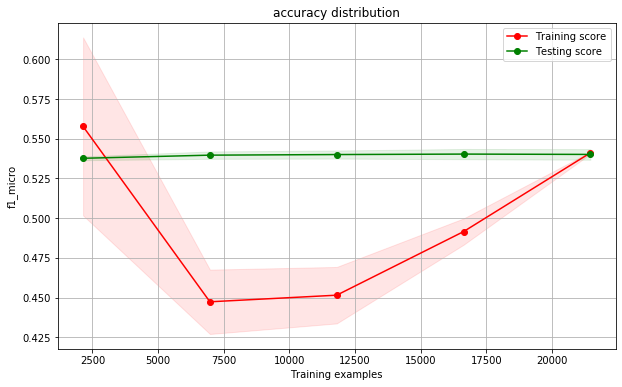

In [103]:
plot_learning_curve(model,'Logistic Regression', x, y, cv=10)